<a href="https://colab.research.google.com/github/fereol023/My-ML-Courses-/blob/main/Regression_polynomiale_simul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
n = 30
theta = np.array([1, -1, 2, -0.8, 0.6, -1]) 
p0 = len(theta)-1

#vraie fonction
f=np.poly1d(np.flip(theta))

#simulation des données
x = np.linspace(0, 1, n)
poly = PolynomialFeatures(degree=p0)
X_sim = poly.fit_transform(x.reshape(-1, 1))
print(X_sim[:5])

sigma = 0.05
noise = np.random.normal(0, sigma, size=n) 
y = np.dot(X_sim,theta)+noise

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.44827586e-02 1.18906064e-03 4.10020911e-05
  1.41386521e-06 4.87539728e-08]
 [1.00000000e+00 6.89655172e-02 4.75624257e-03 3.28016729e-04
  2.26218434e-05 1.56012713e-06]
 [1.00000000e+00 1.03448276e-01 1.07015458e-02 1.10705646e-03
  1.14523082e-04 1.18472154e-05]
 [1.00000000e+00 1.37931034e-01 1.90249703e-02 2.62413383e-03
  3.61949494e-04 4.99240681e-05]]


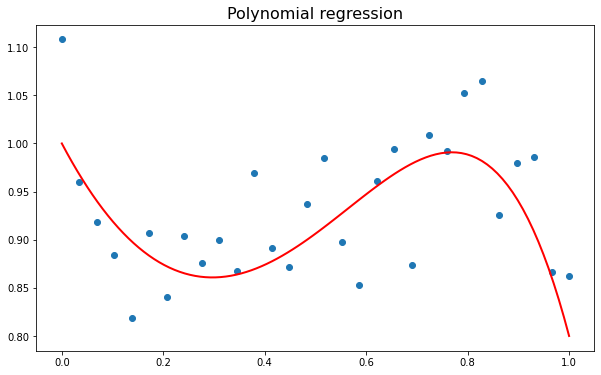

In [71]:
#visualisation avec les points
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression", size=16)
plt.scatter(x, y)
t = np.linspace(0, 1, 100)
plt.plot(t, f(t), c="red",linewidth=2.0)
plt.show()

In [72]:
p=4
# matrice des données
poly = PolynomialFeatures(degree=p,include_bias=False)
X4 = poly.fit_transform(x.reshape(-1, 1))
print(X4)
#==> est la matrice des [x^1 x^2 x^3 x^4]

#regression polynomiale
poly_reg_model = LinearRegression()
poly_reg_model.fit(X4, y)
print(poly_reg_model.coef_)
print("============"*2)
print(poly_reg_model.intercept_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.44827586e-02 1.18906064e-03 4.10020911e-05 1.41386521e-06]
 [6.89655172e-02 4.75624257e-03 3.28016729e-04 2.26218434e-05]
 [1.03448276e-01 1.07015458e-02 1.10705646e-03 1.14523082e-04]
 [1.37931034e-01 1.90249703e-02 2.62413383e-03 3.61949494e-04]
 [1.72413793e-01 2.97265161e-02 5.12526139e-03 8.83665757e-04]
 [2.06896552e-01 4.28061831e-02 8.85645168e-03 1.83236931e-03]
 [2.41379310e-01 5.82639715e-02 1.40637172e-02 3.39469037e-03]
 [2.75862069e-01 7.60998811e-02 2.09930706e-02 5.79119190e-03]
 [3.10344828e-01 9.63139120e-02 2.98905244e-02 9.27636965e-03]
 [3.44827586e-01 1.18906064e-01 4.10020911e-02 1.41386521e-02]
 [3.79310345e-01 1.43876338e-01 5.45737833e-02 2.07004005e-02]
 [4.13793103e-01 1.71224732e-01 7.08516134e-02 2.93179090e-02]
 [4.48275862e-01 2.00951249e-01 9.00815942e-02 4.03814043e-02]
 [4.82758621e-01 2.33055886e-01 1.12509738e-01 5.43150459e-02]
 [5.17241379e-01 2.67538644e-01 1.38382057e-01 7.157692

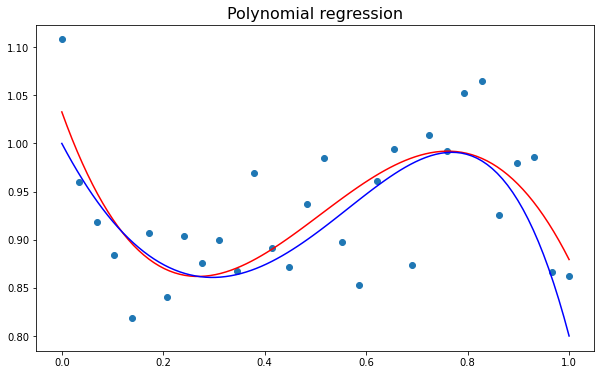

In [73]:
intcpt = np.array([poly_reg_model.intercept_])
cff = np.flip(poly_reg_model.coef_)
f4 = np.poly1d(np.concatenate((cff,intcpt)))

plt.figure(figsize=(10, 6))
plt.title("Polynomial regression", size=16)
plt.scatter(x, y)
plt.plot(t, f4(t), c="red")
plt.plot(t, f(t), c="blue")
plt.show()

Polynome de degré 4

In [74]:
y_fit4 = poly_reg_model.predict(X4)
mse4 = mean_squared_error(y,y_fit4)
print(mse4)
mse_f4 = mean_squared_error(f4(t),f(t))
print(mse_f4)

0.0024974171875421216
0.0003516888305229706


Polynôme de degré 1

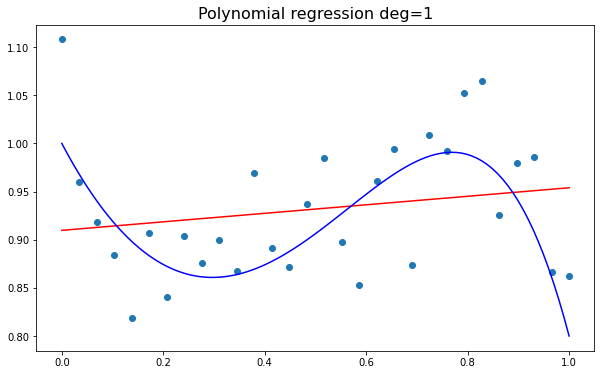

0.004686442530737296
0.0023967057936210272


In [75]:
p=1
# matrice des données
poly = PolynomialFeatures(degree=p,include_bias=False)
X1 = poly.fit_transform(x.reshape(-1, 1))

#regression polynomiale deg 1 // apprentissage
poly_reg_model = LinearRegression()
poly_reg_model.fit(X1, y)
poly_reg_model.coef_
poly_reg_model.intercept_

# visualisation
intcpt = np.array([poly_reg_model.intercept_])
cff = np.flip(poly_reg_model.coef_)
f1 = np.poly1d(np.concatenate((cff,intcpt)))

plt.figure(figsize=(10, 6))
plt.title("Polynomial regression deg=1", size=16)
plt.scatter(x, y)
plt.plot(t, f1(t), c="red")
plt.plot(t, f(t), c="blue")
plt.show()

# scoring
y_fit1 = poly_reg_model.predict(X1)
mse1 = mean_squared_error(y,y_fit1)
print(mse1)
mse_f1 = mean_squared_error(f1(t),f(t))
print(mse_f1)

Polynôme de degré 15

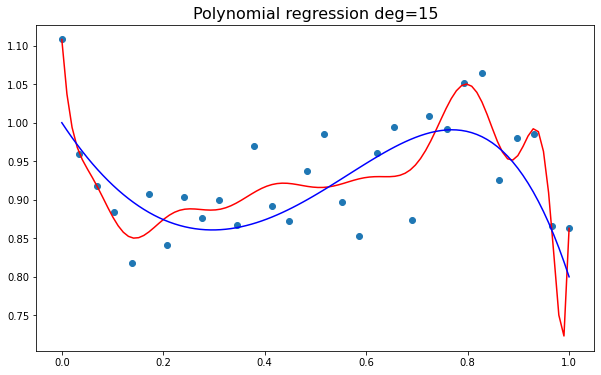

0.0013197682187673458
0.0014418367027000396


In [76]:
p=15
# matrice des données
poly = PolynomialFeatures(degree=p,include_bias=False)
X15 = poly.fit_transform(x.reshape(-1, 1))

#regression polynomiale deg 15 // apprentissage
poly_reg_model = LinearRegression()
poly_reg_model.fit(X15, y)
poly_reg_model.coef_
poly_reg_model.intercept_

# visualisation
intcpt = np.array([poly_reg_model.intercept_])
cff = np.flip(poly_reg_model.coef_)
f15 = np.poly1d(np.concatenate((cff,intcpt)))

plt.figure(figsize=(10, 6))
plt.title("Polynomial regression deg=15", size=16)
plt.scatter(x, y)
plt.plot(t, f15(t), c="red")
plt.plot(t, f(t), c="blue")
plt.show()

# scoring
y_fit15 = poly_reg_model.predict(X15)
mse15 = mean_squared_error(y,y_fit15)
print(mse15)
mse_f15 = mean_squared_error(f15(t),f(t))
print(mse_f15)

Compilation

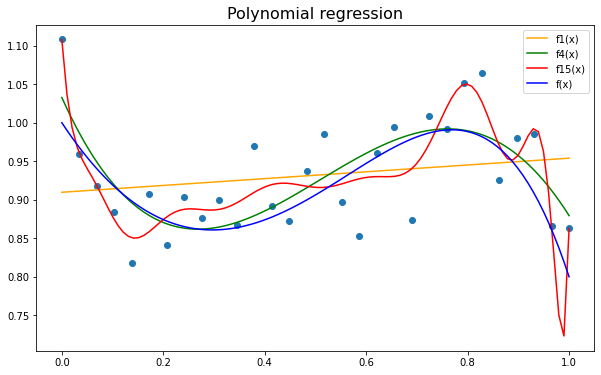

In [79]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression", size=16)
plt.scatter(x, y)
plt.plot(t, f1(t), c="orange")
plt.plot(t, f4(t), c="green")
plt.plot(t, f15(t), c="red")
plt.plot(t, f(t), c="blue")
plt.legend(["f1(x)", "f4(x)", "f15(x)", "f(x)"])
plt.show()

**Compromis biais variance (sur/sous ajustement)**

la courbe de dégré 15 a une grande variance en fonction de l'echt et est donc plus proche des données

Risque de l'estimateur(distance à la vraie fonction) = biais(mesure de l'ajustement) + variance(varie en fonction des estimateurs)

==> degré 1 : biais fort mais variance petite <=> risque fort <br>
==> degré 15 : biais petit variance grande <=> risque fort (mauvaise adaptation à de nouvelles données) <br>
==> degré 4 : bon compromis biais/variance

In [77]:
print('Risque m=1 : ', mse_f1)
print('Risque m=4 : ', mse_f4)
print('Risque m=15 : ', mse_f15)

Risque m=1 :  0.0023967057936210272
Risque m=4 :  0.0003516888305229706
Risque m=15 :  0.0014418367027000396


La valeur de m qui minimise ∥f^m−f∗∥2 est m = 4.
Mesure de l'écart entre la vraie fonction f qui a généré les observations (sans le bruit) et fm.
Le plus bas correspond à m = 4 car la vraie fonction est de dégré m = 4




In [78]:
print('MSE m=1 : ', mse1)
print('MSE m=4 : ', mse4)
print('MSE 15 : ', mse15)

MSE m=1 :  0.004686442530737296
MSE m=4 :  0.0024974171875421216
MSE 15 :  0.0013197682187673458


La valeur de m qui minimise SSE(f^m) cad le risque de l'estimateur est m = 15. 
Mesure de l'ecart entre fm et les données (variable y). Si trop bas ==> possibilité de sur ajustement.   
